In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
%matplotlib inline
import seaborn as sns

In [18]:
path = r"C:\Users\Marcelo\Desktop\AirPassengers.csv"

In [19]:
base = pd.read_csv(path)

In [20]:
base.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


Os meses e anos estão como objetos, o código abaixo retira as datas dos dados, assim trabalharemos apenas com algarísmos. E o índice passa a ser as datas

In [22]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m')
base = pd.read_csv(path, parse_dates = ['Month'],
                   index_col='Month', date_parser = dateparse)

In [23]:
base.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


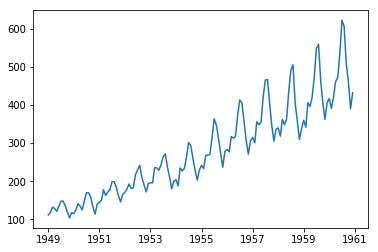

In [24]:
ts = base['#Passengers']
          
plt.plot(ts) 

## Farei uma decomposição da Serie Temporal a fim de observar sua tendência, sazonalidade e seu fator aleatório

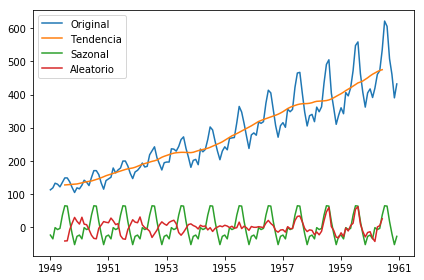

In [73]:
decomposicao = seasonal_decompose(ts) 
   
tendencia = decomposicao.trend 
sazonal = decomposicao.seasonal
aleatorio = decomposicao.resid
 
plt.plot(ts, label = 'Original')

plt.plot(tendencia, label = 'Tendencia')

plt.plot(sazonal, label = 'Sazonal')

plt.plot(aleatorio, label = 'Aleatorio')

plt.legend(loc = 'best')

plt.tight_layout()

### Agora cada fator separadamente

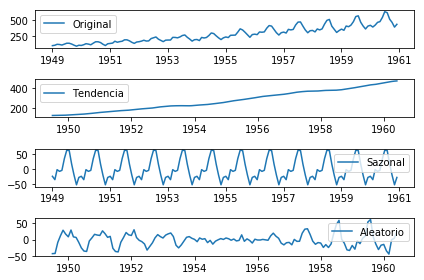

In [74]:
plt.subplot(4,1,1)
plt.plot(ts, label = 'Original')
plt.legend(loc = 'best')

plt.subplot(4,1,2)
plt.plot(tendencia, label = 'Tendencia')
plt.legend(loc = 'best')

plt.subplot(4,1,3)
plt.plot(sazonal, label = 'Sazonal')
plt.legend(loc = 'best')

plt.subplot(4,1,4)
plt.plot(aleatorio, label = 'Aleatorio')
plt.legend(loc = 'best')

plt.tight_layout()

## Aqui podemos notar a diferença do consumo de passagens aéreas do primeiro e último ano que foram coletados os dados

In [69]:
ts[0:11] #Mês 1° ao 12° do primeiro ano

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
1949-06-01    135
1949-07-01    148
1949-08-01    148
1949-09-01    136
1949-10-01    119
1949-11-01    104
Name: #Passengers, dtype: int64

In [70]:
ts['1960-01-01':'1969-12-01']

Month
1960-01-01    417
1960-02-01    391
1960-03-01    419
1960-04-01    461
1960-05-01    472
1960-06-01    535
1960-07-01    622
1960-08-01    606
1960-09-01    508
1960-10-01    461
1960-11-01    390
1960-12-01    432
Name: #Passengers, dtype: int64

## O gráfico mostra o aumento do uso de passagens aéreas ao longo dos anos 50

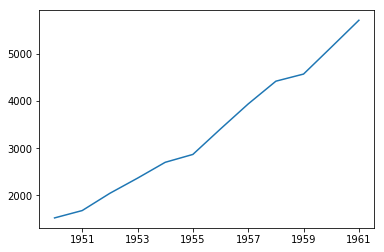

In [62]:
ts_ano = ts.resample('A').sum()
plt.plot(ts_ano)

## Aqui pode-se visualizar soma das viagens em cada mês de todos os anos 

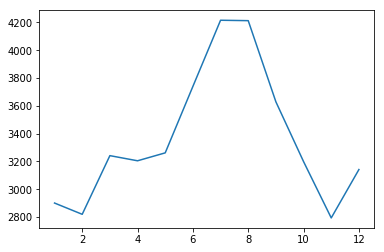

In [67]:
ts_mes = ts.groupby([lambda x: x.month]).sum()
plt.plot(ts_mes)

Com base na imagem, podemos inferir que os americanos viajam mais no verão e logo que ele acaba as vendas de passagens aéreas tendem a despencarem. Portanto, uma companhia aérea poderia utilizar esses dados para, por exemplo, saber o melhor período para abaixar e aumentar os preços de suas passagens. 

## Previsões de valores futuros

In [77]:
modelo = ARIMA(ts, order = (2,1,2))      
model = modelo.fit()    

model.summary()

C:\ProgramData\Anaconda3\Nova pasta\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\Nova pasta\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:          D.#Passengers   No. Observations:                  143
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -666.022
Method:                       css-mle   S.D. of innovations             24.713
Date:                Mon, 02 Mar 2020   AIC                           1344.043
Time:                        15:50:10   BIC                           1361.820
Sample:                    02-01-1949   HQIC                          1351.267
                         - 12-01-1960                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   2.5312      0.708      3.574      0.000       1.143       3.919
ar.L1.D.#Passengers     1.6477      0.033     49.930      0.000       1.583       1.712
ar.L2.D.#Passengers    -0.9094      0.033    -27.877      0.000      -0.973      -0.845
ma.L1.D.#Passengers    -1.9099      0.065    -29.541      0.000      -2.037      -1.783
ma.L2.D.#Passengers     0.9997      0.067     14.820      0.000       0.868       1.132
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.9060           -0.5281j            1.0486           -0.0840
AR.2            0.9060           +0.5281j            1.0486            0.0840
MA.1            0.9552           -0.2964j            1.0001           -0.0479
MA.2            0.9552           +0.2964j            1.0001            0.0479
-----------------------------------------------------------------------------
"""

Os parametros p, q, d (2,1,2) foram escolhidos de acordo com o Auto Arima

In [78]:
previsoes = model.forecast(steps = 12)

In [86]:
pred = pd.DataFrame(previsoes[0])
pred

,0
0,433.120191
1,450.889438
2,479.811458
3,511.969748
4,539.318452
5,555.799454
6,558.747455
7,549.279913
8,531.661795
9,511.904295


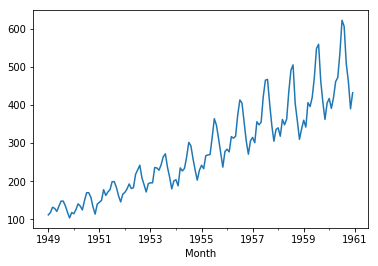

In [90]:
eixo = ts.plot()

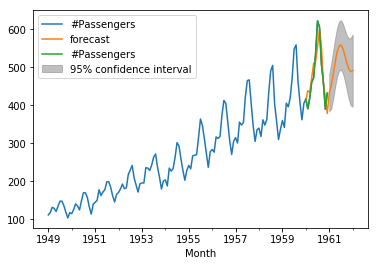

In [91]:
model.plot_predict('1960-01-01','1962-01-01',
                  ax = eixo, plot_insample = True)